# Imports

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

import sys  
sys.path.insert(0, '/home/HPC/camontan/turchetti_paper/')

from clustering_scripts import *

In [2]:
FIGDIR = '/home/HPC/camontan/turchetti_paper/img/paper_tier/'
DPI = 300
# FORMAT = 'png'
FORMAT = 'pdf'

In [3]:
# set latex rendering for plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Setup

In [4]:
OUTDIR = "/home/HPC/camontan/turchetti_paper/output/focused_scan/"

OUTDIR2 = "/home/HPC/camontan/turchetti_paper/output/focused_scan_2/"


"/home/HPC/camontan/turchetti_paper/output/focused_scan/scan_168_201_epsilon_32d0_mu_0d75_analysis_type_tune_default_tune.h5"

'/home/HPC/camontan/turchetti_paper/output/focused_scan/scan_168_201_epsilon_32d0_mu_0d75_analysis_type_tune_default_tune.h5'

In [5]:
TUNES = ["scan_28_31_", "scan_168_201_"]
EXTENTS = [(0, 0.45, 0, 0.45), (0, 0.6, 0, 0.6)]
EPSILONS = ["epsilon_0d0_", "epsilon_32d0_", "epsilon_64d0_"]
MUS = ["mu_0d0_", "mu_0d25_", "mu_0d5_", "mu_0d75_", "mu_1d0_"]

SAMPLES_PER_SIDE = [300]

In [6]:
tune = TUNES[1]
EXTENT = EXTENTS[1]
epsilon = EPSILONS[1]
mu = MUS[0]
samples = SAMPLES_PER_SIDE[0]

In [7]:
def get_hdf5_files(tune, epsilon, mu, samples):
    f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
    f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")
    f_rem = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_rem_rem.h5"), "r")
    f_tune = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tune_default_tune.h5"), "r")
    f_birkhoff = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

    return f_stab, f_lyap, f_rem, f_tune, f_birkhoff

# Figure 1 - some plot survival

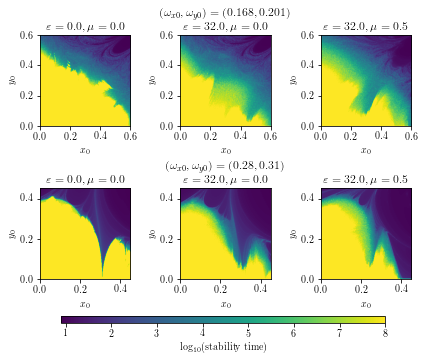

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(6, 5))

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 0].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[1, 0].set_xlabel("$x_0$")
axs[1, 0].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 1].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1, 1].set_xlabel("$x_0$")
axs[1, 1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[1, 2].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[1, 2].set_xlabel("$x_0$")
axs[1, 2].set_ylabel("$y_0$")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
axs[0, 0].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0, 0].set_xlabel("$x_0$")
axs[0, 0].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
axs[0, 1].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[0, 1].set_xlabel("$x_0$")
axs[0, 1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
mappable = axs[0, 2].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[0, 2].set_xlabel("$x_0$")
axs[0, 2].set_ylabel("$y_0$")

# pre-adapt the figure to the colorbar
plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.001)

# create common colorbar at the bottom
cbar_ax = fig.add_axes([0.15, 0.04, 0.75, 0.02])
fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal", label="$\\log_{{10}}($stability time$)$")

# save figure
plt.savefig(os.path.join(FIGDIR, f"stability.{FORMAT}"), bbox_inches="tight", dpi=DPI)

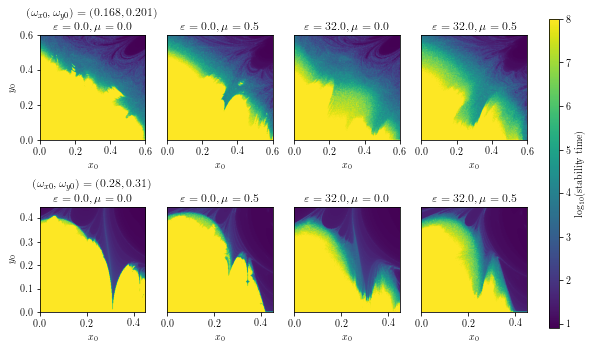

In [13]:
fig = plt.figure(figsize=(8, 5))
gs = gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 0.1], height_ratios=[1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[0, 3]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 2]))
axs.append(plt.subplot(gs[1, 3]))

axs.append(plt.subplot(gs[:, 4]))

axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[1, 1]))

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[3].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[3].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[3].set_xlabel("$x_0$")
axs[3].set_ylabel("$y_0$")

epsilon = EPSILONS[0]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[8].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[8].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.5$")
axs[8].set_xlabel("$x_0$")
axs[8].set_ylabel("$y_0$")

# cancel y ticks
axs[8].set_yticks([])
axs[8].set_yticklabels([])
axs[8].set_ylabel("")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[4].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[4].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[4].set_xlabel("$x_0$")
axs[4].set_ylabel("$y_0$")

# cancel y ticks
axs[4].set_yticks([])
axs[4].set_yticklabels([])
axs[4].set_ylabel("")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[5].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[5].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[5].set_xlabel("$x_0$")
axs[5].set_ylabel("$y_0$")

# cancel y ticks
axs[5].set_yticks([])
axs[5].set_yticklabels([])
axs[5].set_ylabel("")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
axs[0].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

epsilon = EPSILONS[0]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]

axs[7].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[7].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.5$")
axs[7].set_xlabel("$x_0$")
axs[7].set_ylabel("$y_0$")

# cancel y ticks
axs[7].set_yticks([])
axs[7].set_yticklabels([])
axs[7].set_ylabel("")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
axs[1].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1].set_xlabel("$x_0$")
axs[1].set_ylabel("$y_0$")

# cancel y ticks
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[1].set_ylabel("")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")

data = f_stab["stability"][:]
mappable = axs[2].imshow(np.log10(data).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[2].set_xlabel("$x_0$")
axs[2].set_ylabel("$y_0$")

# cancel y ticks
axs[2].set_yticks([])
axs[2].set_yticklabels([])
axs[2].set_ylabel("")

# pre-adapt the figure to the colorbar
plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.001)

# create common colorbar at the bottom
fig.colorbar(mappable, cax=axs[6], orientation="vertical", label="$\\log_{{10}}($stability time$)$")

plt.subplots_adjust(hspace=0.25)
plt.subplots_adjust(wspace=0.25)

# save figure
plt.savefig(os.path.join(FIGDIR, f"stability.{FORMAT}"), bbox_inches="tight", dpi=DPI)

# Figure 2 - LE - FLI comparison

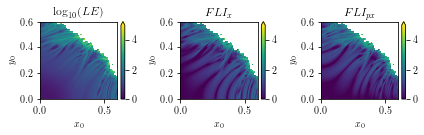

In [137]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(6, 3))
gs = gridspec.GridSpec(1, 3)
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1]),
    plt.subplot(gs[2]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["100/lyapunov_error"][:])
data_fli_x = f_lyap["100/fli_base_x"][:]
data_fli_px = f_lyap["100/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")
axs[1].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[2].set_title("$FLI_{{px}}$")
axs[2].set_xlabel("$x_0$")
axs[2].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.55)

plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_low.{FORMAT}"), bbox_inches="tight", dpi=DPI)

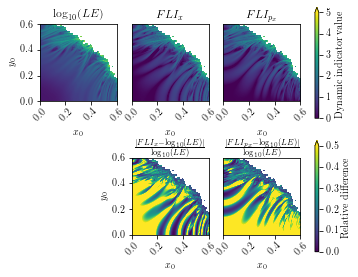

In [48]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 4.5))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05])
axs = [
    plt.subplot(gs[0,0]),
    plt.subplot(gs[0,1]),
    plt.subplot(gs[0,2]),
    plt.subplot(gs[0,3]),

    plt.subplot(gs[1,1]),
    plt.subplot(gs[1,2]),
    plt.subplot(gs[1,3]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["100/lyapunov_error"][:])
data_fli_x = f_lyap["100/fli_base_x"][:]
data_fli_px = f_lyap["100/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")
# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[2].set_title("$FLI_{{p_x}}$")
axs[2].set_xlabel("$x_0$")
# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")

plt.colorbar(map, cax=axs[3], extend="max", label="Dynamic indicator value")

diff_1 = (np.abs(data_fli_x - np.log10(data_le))/np.log10(data_le))
diff_2 = (np.abs(data_fli_px - np.log10(data_le))/np.log10(data_le))

vmax = np.max([np.nanmax(diff_1), np.nanmax(diff_2)])
vmax = 0.5

map = axs[4].imshow(diff_1.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[4].set_title("$\\frac{{|FLI_{{x}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[4].set_xlabel("$x_0$")
# remove y-axis labels
axs[4].set_ylabel("$y_0$")

map = axs[5].imshow(diff_2.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[5].set_title("$\\frac{{|FLI_{{p_x}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[5].set_xlabel("$x_0$")
# remove y-axis labels
axs[5].set_yticklabels([])
axs[5].set_yticks([])
axs[5].set_ylabel("")

plt.colorbar(map, cax=axs[6], label="Relative difference", extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.25)
# set xticks for all plots
for ax in axs:
    ax.set_xticks([0, 0.2, 0.4, 0.6])
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_low.{FORMAT}"), bbox_inches="tight", dpi=DPI)

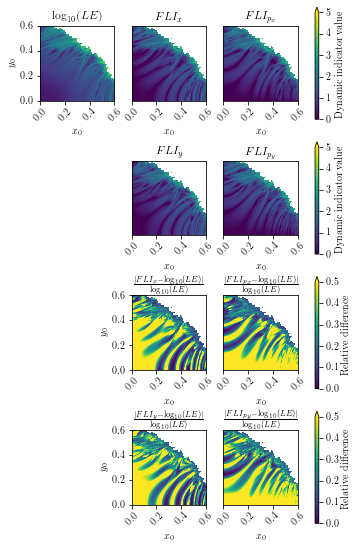

In [18]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 4.75*2))
gs = gridspec.GridSpec(4, 4, width_ratios=[1, 1, 1, 0.05])
axs = [
    plt.subplot(gs[0,0]),
    plt.subplot(gs[0,1]),
    plt.subplot(gs[0,2]),
    plt.subplot(gs[0,3]),

    plt.subplot(gs[2,1]),
    plt.subplot(gs[2,2]),
    plt.subplot(gs[2,3]),

    plt.subplot(gs[1,1]),
    plt.subplot(gs[1,2]),
    plt.subplot(gs[1,3]),

    plt.subplot(gs[3,1]),
    plt.subplot(gs[3,2]),
    plt.subplot(gs[3,3]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["100/lyapunov_error"][:])
data_fli_x = f_lyap["100/fli_base_x"][:]
data_fli_px = f_lyap["100/fli_base_px"][:]
data_fli_y = f_lyap["100/fli_base_y"][:]
data_fli_py = f_lyap["100/fli_base_py"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")
# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[2].set_title("$FLI_{{p_x}}$")
axs[2].set_xlabel("$x_0$")
# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")

plt.colorbar(map, cax=axs[3], extend="max", label="Dynamic indicator value")

diff_1 = (np.abs(data_fli_x - np.log10(data_le))/np.log10(data_le))
diff_2 = (np.abs(data_fli_px - np.log10(data_le))/np.log10(data_le))

vmax = np.max([np.nanmax(diff_1), np.nanmax(diff_2)])
vmax = 0.5

map = axs[4].imshow(diff_1.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[4].set_title("$\\frac{{|FLI_{{x}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[4].set_xlabel("$x_0$")
# remove y-axis labels
axs[4].set_ylabel("$y_0$")

map = axs[5].imshow(diff_2.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[5].set_title("$\\frac{{|FLI_{{p_x}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[5].set_xlabel("$x_0$")
# remove y-axis labels
axs[5].set_yticklabels([])
axs[5].set_yticks([])
axs[5].set_ylabel("")

plt.colorbar(map, cax=axs[6], label="Relative difference", extend="max")

map = axs[7].imshow((data_fli_y).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[7].set_title("$FLI_{{y}}$")
axs[7].set_xlabel("$x_0$")
# remove y-axis labels
axs[7].set_yticklabels([])
axs[7].set_yticks([])
axs[7].set_ylabel("")

map = axs[8].imshow((data_fli_py).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[8].set_title("$FLI_{{p_y}}$")
axs[8].set_xlabel("$x_0$")
# remove y-axis labels
axs[8].set_yticklabels([])
axs[8].set_yticks([])
axs[8].set_ylabel("")

plt.colorbar(map, cax=axs[9], extend="max", label="Dynamic indicator value")

diff_1 = (np.abs(data_fli_y - np.log10(data_le))/np.log10(data_le))
diff_2 = (np.abs(data_fli_py - np.log10(data_le))/np.log10(data_le))

vmax = np.max([np.nanmax(diff_1), np.nanmax(diff_2)])
vmax = 0.5

map = axs[10].imshow(diff_1.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[10].set_title("$\\frac{{|FLI_{{y}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[10].set_xlabel("$x_0$")
# remove y-axis labels
axs[10].set_ylabel("$y_0$")

map = axs[11].imshow(diff_2.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[11].set_title("$\\frac{{|FLI_{{p_y}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[11].set_xlabel("$x_0$")
# remove y-axis labels
axs[11].set_yticklabels([])
axs[11].set_yticks([])
axs[11].set_ylabel("")

plt.colorbar(map, cax=axs[12], label="Relative difference", extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.3)
# set xticks for all plots
for ax in axs:
    ax.set_xticks([0, 0.2, 0.4, 0.6])
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_low.{FORMAT}"), bbox_inches="tight", dpi=DPI)

/tmp/ipykernel_961/3116923574.py:64: RuntimeWarning: invalid value encountered in subtract
  diff_1 = (np.abs(data_fli_x - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_961/3116923574.py:64: RuntimeWarning: invalid value encountered in true_divide
  diff_1 = (np.abs(data_fli_x - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_961/3116923574.py:65: RuntimeWarning: invalid value encountered in subtract
  diff_2 = (np.abs(data_fli_px - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_961/3116923574.py:65: RuntimeWarning: invalid value encountered in true_divide
  diff_2 = (np.abs(data_fli_px - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_961/3116923574.py:104: RuntimeWarning: invalid value encountered in subtract
  diff_1 = (np.abs(data_fli_y - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_961/3116923574.py:104: RuntimeWarning: invalid value encountered in true_divide
  diff_1 = (np.abs(data_fli_y - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_961/31

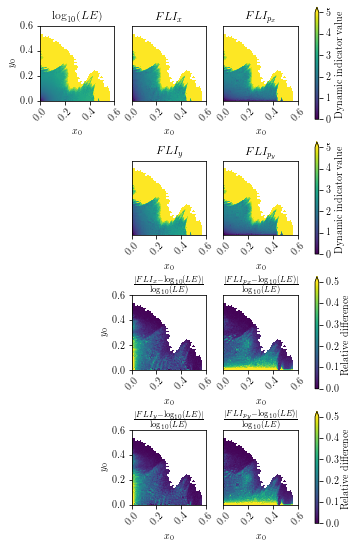

In [19]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 4.75*2))
gs = gridspec.GridSpec(4, 4, width_ratios=[1, 1, 1, 0.05])
axs = [
    plt.subplot(gs[0,0]),
    plt.subplot(gs[0,1]),
    plt.subplot(gs[0,2]),
    plt.subplot(gs[0,3]),

    plt.subplot(gs[2,1]),
    plt.subplot(gs[2,2]),
    plt.subplot(gs[2,3]),

    plt.subplot(gs[1,1]),
    plt.subplot(gs[1,2]),
    plt.subplot(gs[1,3]),

    plt.subplot(gs[3,1]),
    plt.subplot(gs[3,2]),
    plt.subplot(gs[3,3]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["10000/lyapunov_error"][:])
data_fli_x = f_lyap["10000/fli_base_x"][:]
data_fli_px = f_lyap["10000/fli_base_px"][:]
data_fli_y = f_lyap["10000/fli_base_y"][:]
data_fli_py = f_lyap["10000/fli_base_py"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")
# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[2].set_title("$FLI_{{p_x}}$")
axs[2].set_xlabel("$x_0$")
# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")

plt.colorbar(map, cax=axs[3], extend="max", label="Dynamic indicator value")

diff_1 = (np.abs(data_fli_x - np.log10(data_le))/np.log10(data_le))
diff_2 = (np.abs(data_fli_px - np.log10(data_le))/np.log10(data_le))

vmax = np.max([np.nanmax(diff_1), np.nanmax(diff_2)])
vmax = 0.5

map = axs[4].imshow(diff_1.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[4].set_title("$\\frac{{|FLI_{{x}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[4].set_xlabel("$x_0$")
# remove y-axis labels
axs[4].set_ylabel("$y_0$")

map = axs[5].imshow(diff_2.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[5].set_title("$\\frac{{|FLI_{{p_x}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[5].set_xlabel("$x_0$")
# remove y-axis labels
axs[5].set_yticklabels([])
axs[5].set_yticks([])
axs[5].set_ylabel("")

plt.colorbar(map, cax=axs[6], label="Relative difference", extend="max")

map = axs[7].imshow((data_fli_y).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[7].set_title("$FLI_{{y}}$")
axs[7].set_xlabel("$x_0$")
# remove y-axis labels
axs[7].set_yticklabels([])
axs[7].set_yticks([])
axs[7].set_ylabel("")

map = axs[8].imshow((data_fli_py).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=5)
axs[8].set_title("$FLI_{{p_y}}$")
axs[8].set_xlabel("$x_0$")
# remove y-axis labels
axs[8].set_yticklabels([])
axs[8].set_yticks([])
axs[8].set_ylabel("")

plt.colorbar(map, cax=axs[9], extend="max", label="Dynamic indicator value")

diff_1 = (np.abs(data_fli_y - np.log10(data_le))/np.log10(data_le))
diff_2 = (np.abs(data_fli_py - np.log10(data_le))/np.log10(data_le))

vmax = np.max([np.nanmax(diff_1), np.nanmax(diff_2)])
vmax = 0.5

map = axs[10].imshow(diff_1.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[10].set_title("$\\frac{{|FLI_{{y}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[10].set_xlabel("$x_0$")
# remove y-axis labels
axs[10].set_ylabel("$y_0$")

map = axs[11].imshow(diff_2.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[11].set_title("$\\frac{{|FLI_{{p_y}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[11].set_xlabel("$x_0$")
# remove y-axis labels
axs[11].set_yticklabels([])
axs[11].set_yticks([])
axs[11].set_ylabel("")

plt.colorbar(map, cax=axs[12], label="Relative difference", extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.3)
# set xticks for all plots
for ax in axs:
    ax.set_xticks([0, 0.2, 0.4, 0.6])
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_high.{FORMAT}"), bbox_inches="tight", dpi=DPI)

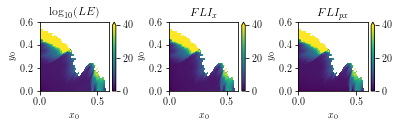

In [346]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(6, 3))
gs = gridspec.GridSpec(1, 3)
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1]),
    plt.subplot(gs[2]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["10000/lyapunov_error"][:])
data_fli_x = f_lyap["10000/fli_base_x"][:]
data_fli_px = f_lyap["10000/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")
axs[1].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[2].set_title("$FLI_{{px}}$")
axs[2].set_xlabel("$x_0$")
axs[2].set_ylabel("$y_0$")

divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(map, cax=cax, extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.7)

#plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_high.{FORMAT}"), bbox_inches="tight", dpi=DPI)

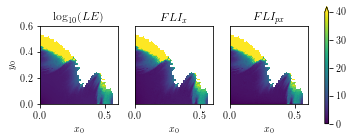

In [236]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 2))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1], sharey=axs[0]),
    plt.subplot(gs[2], sharey=axs[0]),
    plt.subplot(gs[3]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["10000/lyapunov_error"][:])
data_fli_x = f_lyap["10000/fli_base_x"][:]
data_fli_px = f_lyap["10000/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")

# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[2].set_title("$FLI_{{px}}$")
axs[2].set_xlabel("$x_0$")

# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")

plt.colorbar(map, cax=axs[3], extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.7)

plt.tight_layout()

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_high.{FORMAT}"), bbox_inches="tight", dpi=DPI)

/tmp/ipykernel_32347/2808102134.py:58: RuntimeWarning: invalid value encountered in subtract
  diff_1 = (np.abs(data_fli_x - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_32347/2808102134.py:58: RuntimeWarning: invalid value encountered in true_divide
  diff_1 = (np.abs(data_fli_x - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_32347/2808102134.py:59: RuntimeWarning: invalid value encountered in subtract
  diff_2 = (np.abs(data_fli_px - np.log10(data_le))/np.log10(data_le))
/tmp/ipykernel_32347/2808102134.py:59: RuntimeWarning: invalid value encountered in true_divide
  diff_2 = (np.abs(data_fli_px - np.log10(data_le))/np.log10(data_le))


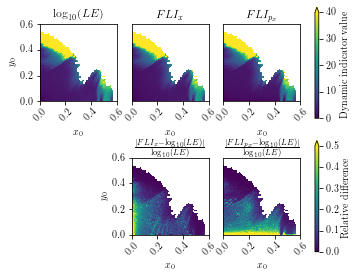

In [47]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))

fig = plt.figure(figsize=(5, 4.5))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05])
axs = [
    plt.subplot(gs[0,0]),
    plt.subplot(gs[0,1]),
    plt.subplot(gs[0,2]),
    plt.subplot(gs[0,3]),

    plt.subplot(gs[1,1]),
    plt.subplot(gs[1,2]),
    plt.subplot(gs[1,3]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[2]
mu = MUS[2]

f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

data_le = np.sqrt(f_lyap["10000/lyapunov_error"][:])
data_fli_x = f_lyap["10000/fli_base_x"][:]
data_fli_px = f_lyap["10000/fli_base_px"][:]

map = axs[0].imshow(np.log10(data_le).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[0].set_title("$\\log_{{10}}(LE)$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

map = axs[1].imshow((data_fli_x).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[1].set_title("$FLI_{{x}}$")
axs[1].set_xlabel("$x_0$")

# remove y-axis labels
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")

map = axs[2].imshow((data_fli_px).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0, vmax=40)
axs[2].set_title("$FLI_{{p_x}}$")
axs[2].set_xlabel("$x_0$")

# remove y-axis labels
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")


plt.colorbar(map, cax=axs[3], extend="max", label="Dynamic indicator value")


diff_1 = (np.abs(data_fli_x - np.log10(data_le))/np.log10(data_le))
diff_2 = (np.abs(data_fli_px - np.log10(data_le))/np.log10(data_le))

vmax = np.max([np.nanmax(diff_1), np.nanmax(diff_2)])
vmax = 0.5

map = axs[4].imshow(diff_1.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[4].set_title("$\\frac{{|FLI_{{x}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[4].set_xlabel("$x_0$")
# remove y-axis labels
axs[4].set_ylabel("$y_0$")

map = axs[5].imshow(diff_2.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmin=0.0, vmax=vmax)
axs[5].set_title("$\\frac{{|FLI_{{p_x}} - \\log_{{10}}(LE)|}}{{\\log_{{10}}(LE)}}$")
axs[5].set_xlabel("$x_0$")
# remove y-axis labels
axs[5].set_yticklabels([])
axs[5].set_yticks([])
axs[5].set_ylabel("")

plt.colorbar(map, cax=axs[6], label="Relative difference", extend="max")

# add space between subplots
plt.subplots_adjust(wspace=0.25)
# set xticks for all plots
for ax in axs:
    ax.set_xticks([0, 0.2, 0.4, 0.6])
    # rotate xticks
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# save figure
plt.savefig(os.path.join(FIGDIR, f"LE_FLI_high.{FORMAT}"), bbox_inches="tight", dpi=DPI)

In [72]:
f_lyap["1000"].keys()

<KeysViewHDF5 ['fli_base_px', 'fli_base_py', 'fli_base_x', 'fli_base_y', 'gali', 'lyapunov_error']>

# Figure 4-5: comparison lyapunov birkhoff 

In [237]:
f = h5py.File(f"/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5", 'r')
f_stab = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_stability_stability.h5", "r")
f_lyap = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_tangent_map_tangent_stuff.h5", "r")

In [238]:
data = f_stab["stability"][:]
mask = np.log10(data)==8

In [239]:
ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

gt_thesh = find_threshold(np.log10(ground_truth_data[mask]))
ground_truth = np.log10(ground_truth_data) > gt_thesh

In [240]:
times = []
lyapunov_data = []

for key in f.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_data.append(f[key]['lyapunov_x'][:])

# sort times and lyapunov data
times, lyapunov_data = zip(*sorted(zip(times, lyapunov_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_data = np.array(lyapunov_data)

In [241]:
lyapunov_thresholds = []
lyapunov_post_data = []
lyapunov_guesses = []
lyapunov_scores = []
for t, data in zip(times, lyapunov_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_post_data.append(data)
    lyapunov_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_thresholds[-1])
    lyapunov_guesses.append(guess)
    lyapunov_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/3532671731.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log1

In [242]:
times = []
lyapunov_b_data = []

for key in f.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_b_data.append(f[key]['lyapunov_b_x'][:])

# sort times and lyapunov_b data
times, lyapunov_b_data = zip(*sorted(zip(times, lyapunov_b_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_b_data = np.array(lyapunov_b_data)

In [243]:
lyapunov_b_thresholds = []
lyapunov_b_post_data = []
lyapunov_b_guesses = []
lyapunov_b_scores = []
for t, data in zip(times, lyapunov_b_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_b_post_data.append(data)
    lyapunov_b_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_b_thresholds[-1])
    lyapunov_b_guesses.append(guess)
    lyapunov_b_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/60600207.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipyke

-17.725433391388307 -2.0972086217638166
(50, 50)


/tmp/ipykernel_4404/2555289723.py:5: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


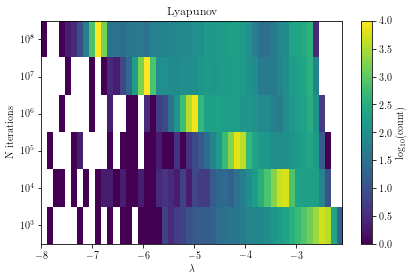

In [244]:
val_min, val_max = get_extents([l[mask] for l in lyapunov_post_data[14::7]], 10)
print(val_min, val_max)
val_min = -8
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=4.0)

# for i, threshold in enumerate(lyapunov_thresholds[14::7]):
#     plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

# plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\lambda$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.title("Lyapunov")
plt.tight_layout()

-17.735895734702694 -2.0609229340758577
(50, 50)


/tmp/ipykernel_4404/393427748.py:6: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


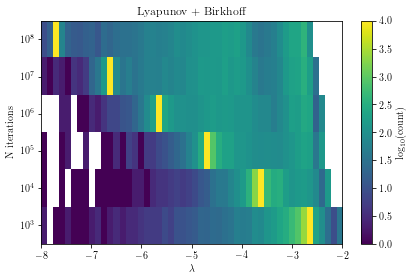

In [245]:
val_min, val_max = get_extents([l[mask] for l in lyapunov_b_post_data[14::7]], 10)
print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_b_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

plt.imshow(tmp_data, origin='lower', cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=4.0)

vmax = np.max(tmp_data)

# for i, threshold in enumerate(lyapunov_thresholds[14::7]):
#     plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

# plt.xticks(rotation=45)
# set labels in y axis
plt.yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]])
plt.xlabel("$\lambda$")
plt.ylabel("N iterations")
plt.colorbar(label="$\log_{10}(\mathrm{count})$")
plt.title("Lyapunov + Birkhoff")
plt.tight_layout()

-17.725433391388307 -2.0972086217638166
(50, 50)
-17.735895734702694 -2.0609229340758577
(50, 50)


/tmp/ipykernel_4404/4100762100.py:13: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_4404/4100762100.py:34: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


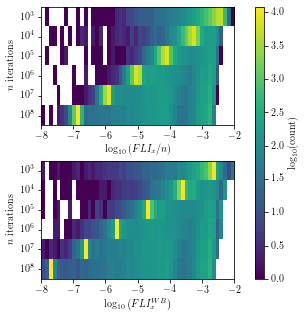

In [253]:
fig = plt.figure(figsize=(4, 5))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 0.05])
axs = []
axs.append(plt.subplot(gs[0,0]))
axs.append(plt.subplot(gs[1,0]))
axs.append(plt.subplot(gs[:,1]))

val_min, val_max = get_extents([l[mask] for l in lyapunov_post_data[14::7]], 10)
print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

map = axs[0].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

# for i, threshold in enumerate(lyapunov_thresholds[14::7]):
#     plt.plot([threshold, threshold], [i-0.475, i+0.48], color='r', linewidth=2)

# plt.xticks(rotation=45)
# set labels in y axis
axs[0].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[0].set_ylabel("$n$ iterations")
# axs[0].set_title("Standard mean")

val_min, val_max = get_extents([l[mask] for l in lyapunov_b_post_data[14::7]], 10)
print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in lyapunov_b_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

axs[1].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

axs[1].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])
axs[0].set_xlabel("$\\log_{{10}}\\left(FLI_x/n\\right)$")
axs[1].set_xlabel("$\\log_{{10}}\\left(FLI_x^{{WB}}\\right)$")

plt.colorbar(map, cax=axs[2], label="$\log_{10}(\mathrm{count})$")
# axs[1].set_title("Weighted Birkhoff averaging")
axs[1].set_ylabel("$n$ iterations")

# increase vertical distance subplots
plt.subplots_adjust(hspace=0.3)

plt.savefig(os.path.join(FIGDIR, f"lyapunov_birkhoff_map.{FORMAT}"), bbox_inches='tight', dpi=300)

/tmp/ipykernel_4404/1803742857.py:23: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_1[14:])
/tmp/ipykernel_4404/1803742857.py:29: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[14:])
/tmp/ipykernel_4404/1803742857.py:70: RuntimeWarning: invalid value encountered in log
  tmp_data = np.log(data_2[14:])


[-0.06923757 -6.30368054]
[ 1.36084350e-04 -7.43062152e+00]


/tmp/ipykernel_4404/1803742857.py:100: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


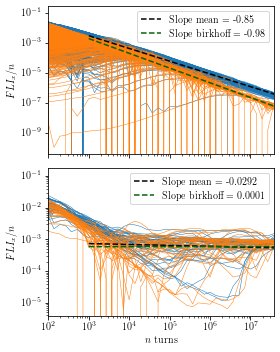

In [255]:
mask = np.logical_and(f['37275937']['lyapunov_b_x'][:] > 1e-8, f['37275937']['lyapunov_b_x'][:] < 1e-7)
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][mask][::10])
    data_2.append(f[key]['lyapunov_b_x'][mask][::10])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

# fit a line to the log log data
tmp_data = np.log(data_1[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn_2 = np.poly1d(fit_2)

fig, axs = plt.subplots(2, 1, figsize=(4, 5), sharex=True)

axs[0].plot(time, data_1, linewidth=0.5, c='C0')
axs[0].plot(time, data_2, linewidth=0.5, c='C1')
axs[0].plot(time[14:], np.exp(fit_fn(np.log(time[14:]))), "--", label='Slope mean = {:.2f}'.format(fit[0]), c="black")
axs[0].plot(time[14:], np.exp(fit_fn_2(np.log(time[14:]))), "--", label='Slope birkhoff = {:.2f}'.format(fit_2[0]), c="darkgreen")

mask = np.logical_and(f['37275937']['lyapunov_b_x'][:] > 5e-4, f['37275937']['lyapunov_b_x'][:] < 1e-3)
time = []
data_1 = []
data_2 = []

for key in f:
    if not key.isdigit():
        continue
    time.append(int(key))
    data_1.append(f[key]['lyapunov_x'][mask][::10])
    data_2.append(f[key]['lyapunov_b_x'][mask][::10])

time = np.array(time)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

sort_idx = np.argsort(time)
time = time[sort_idx]
data_1 = data_1[sort_idx]
data_2 = data_2[sort_idx]

# fit a line to the log log data
tmp_data = np.log(data_1[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
fit_fn = np.poly1d(fit)

tmp_data = np.log(data_2[14:])
tmp_data = np.nanmean(tmp_data, axis=1)
mask = ~np.isnan(tmp_data)
fit_2 = np.polyfit(np.log(time[14:][mask]), (tmp_data[mask]), 1)
print(fit)
fit[0] += 0.04
fit[1] -= 0.7
print(fit_2)
fit_fn_2 = np.poly1d(fit_2)

axs[1].plot(time, data_1, linewidth=0.5, c='C0')
axs[1].plot(time, data_2, linewidth=0.5, c='C1')
axs[1].plot(time[14:], np.exp(fit_fn(np.log(time[14:]))), "--", label='Slope mean = {:.4f}'.format(fit[0]), c="black")
axs[1].plot(time[14:], np.exp(fit_fn_2(np.log(time[14:]))), "--", label='Slope birkhoff = {:.4f}'.format(fit_2[0]), c="darkgreen")

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlim(left=1e2, right=37275937)

axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xlim(left=1e2, right=37275937)

axs[0].legend()
axs[1].legend()
axs[1].set_xlabel("$n$ turns")
axs[0].set_ylabel("$FLI_x/n$")
axs[1].set_ylabel("$FLI_x/n$")
# plt.title(f"Lyapunov exponent for stable particles")

plt.tight_layout()

plt.savefig(os.path.join(FIGDIR, f"lyap_birkhoff.{FORMAT}"), dpi=300)

# Figure 6 - Ground Truth

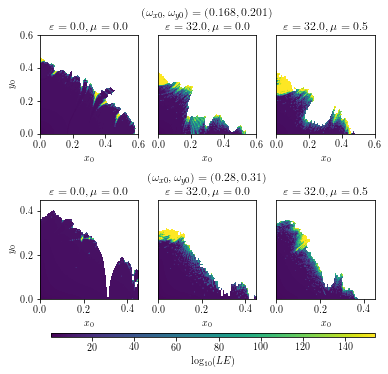

In [267]:
fig, axs = plt.subplots(2, 3, figsize=(6, 5))

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 0].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[1, 0].set_xlabel("$x_0$")
axs[1, 0].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 1].imshow(ground_truth_data.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1, 1].set_xlabel("$x_0$")
axs[1, 1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 2].imshow(ground_truth_data.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[1, 2].set_xlabel("$x_0$")
axs[1, 2].set_ylabel("$y_0$")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 0].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0, 0].set_xlabel("$x_0$")
axs[0, 0].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 1].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[0, 1].set_xlabel("$x_0$")
axs[0, 1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

mappable = axs[0, 2].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[0, 2].set_xlabel("$x_0$")
axs[0, 2].set_ylabel("$y_0$")


# remove y axis label and ticks
axs[1, 1].set_yticklabels([])
axs[1, 1].set_yticks([])
axs[1, 1].set_ylabel("")

# remove y axis label and ticks
axs[1, 2].set_yticklabels([])
axs[1, 2].set_yticks([])
axs[1, 2].set_ylabel("")

# remove y axis label and ticks
axs[0, 1].set_yticklabels([])
axs[0, 1].set_yticks([])
axs[0, 1].set_ylabel("")

# remove y axis label and ticks
axs[0, 2].set_yticklabels([])
axs[0, 2].set_yticks([])
axs[0, 2].set_ylabel("")

# pre-adapt the figure to the colorbar
#plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.55)

# create common colorbar at the bottom
cbar_ax = fig.add_axes([0.15, 0.03, 0.75, 0.01])
fig.colorbar(mappable, cax=cbar_ax, orientation="horizontal", label="$\\log_{{10}}(LE)$")

# save figure
plt.savefig(os.path.join(FIGDIR, f"gt_example_colormap.{FORMAT}"), bbox_inches="tight", dpi=DPI)

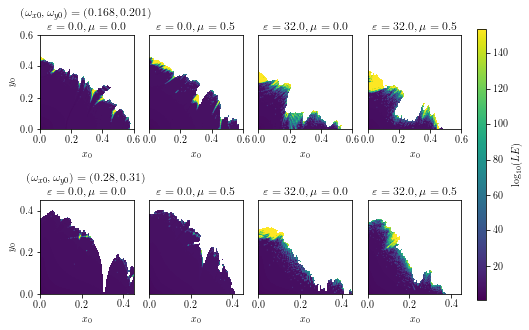

In [24]:
fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 0.1], height_ratios=[1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[0, 3]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 2]))
axs.append(plt.subplot(gs[1, 3]))

axs.append(plt.subplot(gs[:, 4]))

axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[1, 1]))

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[3].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[3].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[3].set_xlabel("$x_0$")
axs[3].set_ylabel("$y_0$")

epsilon = EPSILONS[0]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[8].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[8].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.5$")
axs[8].set_xlabel("$x_0$")
axs[8].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[4].imshow(ground_truth_data.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[4].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[4].set_xlabel("$x_0$")
axs[4].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[5].imshow(ground_truth_data.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[5].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[5].set_xlabel("$x_0$")
axs[5].set_ylabel("$y_0$")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[0].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")

epsilon = EPSILONS[0]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[7].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[7].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.5$")
axs[7].set_xlabel("$x_0$")
axs[7].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[1].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1].set_xlabel("$x_0$")
axs[1].set_ylabel("$y_0$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

mappable = axs[2].imshow((ground_truth_data/2).reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis")
axs[2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[2].set_xlabel("$x_0$")
axs[2].set_ylabel("$y_0$")


# remove y axis label and ticks
axs[4].set_yticklabels([])
axs[4].set_yticks([])
axs[4].set_ylabel("")

# remove y axis label and ticks
axs[5].set_yticklabels([])
axs[5].set_yticks([])
axs[5].set_ylabel("")

# remove y axis label and ticks
axs[8].set_yticklabels([])
axs[8].set_yticks([])
axs[8].set_ylabel("")

# remove y axis label and ticks
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel("")

# remove y axis label and ticks
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_ylabel("")

# remove y axis label and ticks
axs[7].set_yticklabels([])
axs[7].set_yticks([])
axs[7].set_ylabel("")


# pre-adapt the figure to the colorbar
#plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.55)

# create common colorbar at the bottom
fig.colorbar(mappable, cax=axs[6], orientation="vertical", label="$\\log_{{10}}(LE)$")

# save figure
plt.savefig(os.path.join(FIGDIR, f"gt_example_colormap.{FORMAT}"), bbox_inches="tight", dpi=DPI)

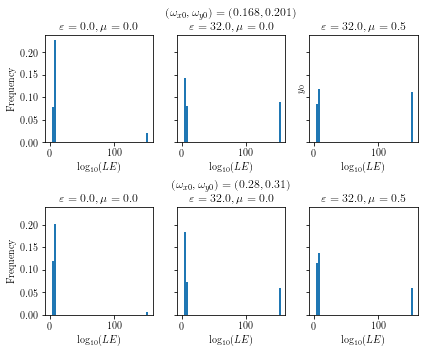

In [269]:
fig, axs = plt.subplots(2, 3, figsize=(6, 5), sharey=True)

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 0].hist((ground_truth_data/2), density=True, bins=50)
axs[1, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[1, 0].set_xlabel("$\\log_{{10}}(LE)$")
axs[1, 0].set_ylabel("Frequency")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 1].hist(ground_truth_data/2, density=True, bins=50)
axs[1, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1, 1].set_xlabel("$\\log_{{10}}(LE)$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 2].hist(ground_truth_data/2, density=True, bins=50)
axs[1, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[1, 2].set_xlabel("$\\log_{{10}}(LE)$")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 0].hist((ground_truth_data/2), density=True, bins=50)
axs[0, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0, 0].set_xlabel("$\\log_{{10}}(LE)$")
axs[0, 0].set_ylabel("Frequency")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 1].hist((ground_truth_data/2), density=True, bins=50)
axs[0, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[0, 1].set_xlabel("$\\log_{{10}}(LE)$")


epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 2].hist((ground_truth_data/2), density=True, bins=50)
axs[0, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[0, 2].set_xlabel("$\\log_{{10}}(LE)$")
axs[0, 2].set_ylabel("$y_0$")

# pre-adapt the figure to the colorbar
plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.6)


# save figure
plt.savefig(os.path.join(FIGDIR, f"gt_example_hist.{FORMAT}"), bbox_inches="tight", dpi=DPI)

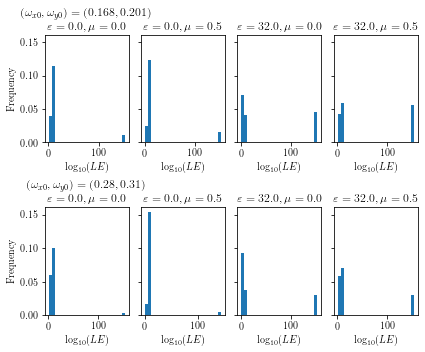

In [32]:
fig, axs = plt.subplots(2, 4, figsize=(6, 5), sharey=True)

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 0].hist((ground_truth_data/2), density=True, bins=25)
axs[1, 0].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[1, 0].set_xlabel("$\\log_{{10}}(LE)$")
axs[1, 0].set_ylabel("Frequency")

epsilon = EPSILONS[0]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 1].hist(ground_truth_data/2, density=True, bins=25)
axs[1, 1].set_title("\n$\\varepsilon = 0.0, \\mu = 0.5$")
axs[1, 1].set_xlabel("$\\log_{{10}}(LE)$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 2].hist(ground_truth_data/2, density=True, bins=25)
axs[1, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1, 2].set_xlabel("$\\log_{{10}}(LE)$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 3].hist(ground_truth_data/2, density=True, bins=25)
axs[1, 3].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[1, 3].set_xlabel("$\\log_{{10}}(LE)$")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 0].hist((ground_truth_data/2), density=True, bins=25)
axs[0, 0].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0, 0].set_xlabel("$\\log_{{10}}(LE)$")
axs[0, 0].set_ylabel("Frequency")

epsilon = EPSILONS[0]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 1].hist((ground_truth_data/2), density=True, bins=25)
axs[0, 1].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.5$")
axs[0, 1].set_xlabel("$\\log_{{10}}(LE)$")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 2].hist((ground_truth_data/2), density=True, bins=25)
axs[0, 2].set_title("\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[0, 2].set_xlabel("$\\log_{{10}}(LE)$")


epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 3].hist((ground_truth_data/2), density=True, bins=25)
axs[0, 3].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[0, 3].set_xlabel("$\\log_{{10}}(LE)$")

# pre-adapt the figure to the colorbar
plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.6)
plt.subplots_adjust(wspace=0.15)


# save figure
plt.savefig(os.path.join(FIGDIR, f"gt_example_hist.{FORMAT}"), bbox_inches="tight", dpi=DPI)

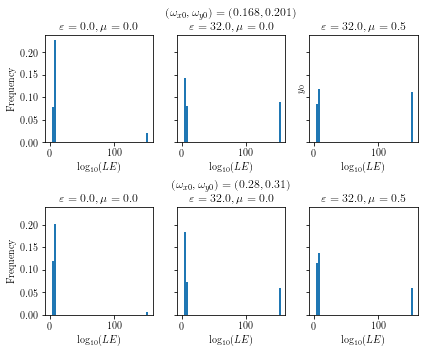

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(6, 5), sharey=True)

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 0].hist((ground_truth_data/2), density=True, bins=50)
axs[1, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[1, 0].set_xlabel("$\\log_{{10}}(LE)$")
axs[1, 0].set_ylabel("Frequency")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 1].hist(ground_truth_data/2, density=True, bins=50)
axs[1, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.28, 0.31)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[1, 1].set_xlabel("$\\log_{{10}}(LE)$")

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[1, 2].hist(ground_truth_data/2, density=True, bins=50)
axs[1, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[1, 2].set_xlabel("$\\log_{{10}}(LE)$")

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[1]
EXTENT = EXTENTS[1]

epsilon = EPSILONS[0]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 0].hist((ground_truth_data/2), density=True, bins=50)
axs[0, 0].set_title(" \n$\\varepsilon = 0.0, \\mu = 0.0$")
axs[0, 0].set_xlabel("$\\log_{{10}}(LE)$")
axs[0, 0].set_ylabel("Frequency")

epsilon = EPSILONS[1]
mu = MUS[0]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 1].hist((ground_truth_data/2), density=True, bins=50)
axs[0, 1].set_title("$(\\omega_{{x0}}, \\omega_{{y0}})=(0.168, 0.201)$\n$\\varepsilon = 32.0, \\mu = 0.0$")
axs[0, 1].set_xlabel("$\\log_{{10}}(LE)$")


epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

data = f_stab["stability"][:]
mask = np.log10(data) == 8

ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

axs[0, 2].hist((ground_truth_data/2), density=True, bins=50)
axs[0, 2].set_title(" \n$\\varepsilon = 32.0, \\mu = 0.5$")
axs[0, 2].set_xlabel("$\\log_{{10}}(LE)$")
axs[0, 2].set_ylabel("$y_0$")

# pre-adapt the figure to the colorbar
plt.tight_layout()

# make rows closer together
plt.subplots_adjust(hspace=0.6)


# save figure
plt.savefig(os.path.join(FIGDIR, f"gt_example_hist.{FORMAT}"), bbox_inches="tight", dpi=DPI)

# Figure 7 - Ground Truth

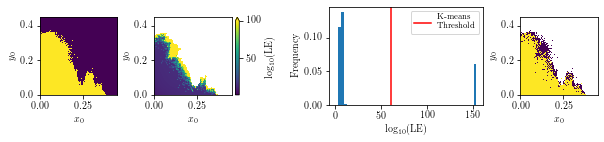

In [270]:
fig = plt.figure(figsize=(10, 1.8))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1.1, 0.2, 2, 1])
axs = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1]),
    plt.subplot(gs[3]),
    plt.subplot(gs[4]),
]

samples = SAMPLES_PER_SIDE[0]
tune = TUNES[0]
EXTENT = EXTENTS[0]

epsilon = EPSILONS[1]
mu = MUS[2]

f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")

# plot the stability
data = f_stab["stability"][:]
mask = np.log10(data)==8

axs[0].imshow(mask.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", interpolation="none")

# plot the lyapunov
ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

cmap = axs[1].imshow(ground_truth_data.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", vmax=100)
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}($LE$)$", extend="max")
# cb.set_label(label="$\\log_{{10}}($FLI$)$ at $n_\\mathrm{max}=10^8$", fontsize="x-small")

gt_thesh = find_threshold(np.log10(ground_truth_data[mask]))

axs[2].hist((ground_truth_data[mask]/2), bins=50, density=True)
axs[2].axvline(10**gt_thesh, c="red", label="K-means\nThreshold")
axs[2].legend(fontsize="small")

ground_truth = np.log10(ground_truth_data) < gt_thesh

ground_truth_a = np.asarray(ground_truth, dtype=float)
ground_truth_a[~mask] = np.nan

axs[3].imshow(ground_truth_a.reshape(samples, samples), origin="lower", extent=EXTENT, cmap="viridis", interpolation="none")
axs[3].set_xlabel("$x_0$")
axs[3].set_ylabel("$y_0$")
axs[0].set_xlabel("$x_0$")
axs[0].set_ylabel("$y_0$")
axs[1].set_xlabel("$x_0$")
axs[1].set_ylabel("$y_0$")

axs[2].set_xlabel("$\\log_{{10}}($LE$)$")
axs[2].set_ylabel("Frequency")
plt.subplots_adjust(wspace=.45)

plt.savefig(os.path.join(FIGDIR, f"GT.{FORMAT}"), dpi=300, bbox_inches="tight")

# plt.tight_layout()

# Figure 4? - multiple distribution evolutions

In [10]:
tune = TUNES[1]
EXTENT = EXTENTS[1]
epsilon = EPSILONS[1]
mu = MUS[1]
samples = SAMPLES_PER_SIDE[0]

In [11]:
f_stab = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_stability_stability.h5"), "r")
f_lyap = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_tangent_map_tangent_stuff.h5"), "r")
f_rem = h5py.File(os.path.join(OUTDIR, tune + epsilon + mu + "analysis_type_rem_rem.h5"), "r")
f_tune = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_tune_tune.h5"), "r")
f_birkhoff = h5py.File(os.path.join(OUTDIR2, tune + epsilon + mu + "analysis_type_lyapunov_birkhoff_lyapunov_birkhoff.h5"), "r")

In [12]:
data = f_stab["stability"][:]
mask = np.log10(data)==8

In [13]:
ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

In [14]:
gt_thesh = find_threshold(np.log10(ground_truth_data[mask]))
ground_truth = np.log10(ground_truth_data) > gt_thesh

# Load lyapunov error

In [15]:
times = []
lyapunov_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_data.append(f_lyap[key]['lyapunov_error'][:])

# sort times and lyapunov data
times, lyapunov_data = zip(*sorted(zip(times, lyapunov_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_data = np.array(lyapunov_data)

In [16]:
lyapunov_thresholds = []
lyapunov_post_data = []
lyapunov_guesses = []
lyapunov_scores = []
for t, data in zip(times, lyapunov_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_post_data.append(data)
    lyapunov_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_thresholds[-1])
    lyapunov_guesses.append(guess)
    lyapunov_scores.append(classify_data(ground_truth[mask], guess[mask]))

# Load FLIs

In [17]:
times = []
fli_x_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    fli_x_data.append(f_lyap[key]['fli_base_x'][:])

# sort times and lyapunov data
times, fli_x_data = zip(*sorted(zip(times, fli_x_data)))

# convert to numpy arrays
times = np.array(times)
fli_x_data = np.array(fli_x_data)

In [18]:
fli_x_thresholds = []
fli_x_post_data = []
fli_x_guesses = []
fli_x_scores = []
for t, data in zip(times, fli_x_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_x_post_data.append(data)

    fli_x_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_x_thresholds[-1])
    fli_x_guesses.append(guess)
    fli_x_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [19]:
times = []
fli_px_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    fli_px_data.append(f_lyap[key]['fli_base_px'][:])

# sort times and lyapunov data
times, fli_px_data = zip(*sorted(zip(times, fli_px_data)))

# convert to numpy arrays
times = np.array(times)
fli_px_data = np.array(fli_px_data)

In [20]:
fli_px_thresholds = []
fli_px_post_data = []
fli_px_guesses = []
fli_px_scores = []
for t, data in zip(times, fli_px_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_px_post_data.append(data)

    fli_px_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_px_thresholds[-1])
    fli_px_guesses.append(guess)
    fli_px_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [21]:
times = []
fli_y_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    fli_y_data.append(f_lyap[key]['fli_base_y'][:])

# sort times and lyapunov data
times, fli_y_data = zip(*sorted(zip(times, fli_y_data)))

# convert to numpy arrays
times = np.array(times)
fli_y_data = np.array(fli_y_data)

In [22]:
fli_y_thresholds = []
fli_y_post_data = []
fli_y_guesses = []
fli_y_scores = []
for t, data in zip(times, fli_y_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_y_post_data.append(data)

    fli_y_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_y_thresholds[-1])
    fli_y_guesses.append(guess)
    fli_y_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [23]:
times = []
fli_py_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    fli_py_data.append(f_lyap[key]['fli_base_py'][:])

# sort times and lyapunov data
times, fli_py_data = zip(*sorted(zip(times, fli_py_data)))

# convert to numpy arrays
times = np.array(times)
fli_py_data = np.array(fli_py_data)

In [24]:
fli_py_thresholds = []
fli_py_post_data = []
fli_py_guesses = []
fli_py_scores = []
for t, data in zip(times, fli_py_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_py_post_data.append(data)

    fli_py_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_py_thresholds[-1])
    fli_py_guesses.append(guess)
    fli_py_scores.append(classify_data(ground_truth[mask], guess[mask]))

# Load GALI

In [25]:
times = []
gali_data = []

for key in f_lyap.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    gali_data.append(f_lyap[key]['gali'][:])

# sort times and lyapunov data
times, gali_data = zip(*sorted(zip(times, gali_data)))

# convert to numpy arrays
times = np.array(times)
gali_data = np.array(gali_data)

In [26]:
gali_thresholds = []
gali_post_data = []
gali_guesses = []
gali_scores = []
for t, data in zip(times, gali_data):
    data[mask & (np.isnan(data))] = np.nanmin(data[mask])
    data = np.log10(data)
    data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
    data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
    gali_post_data.append(data)

    gali_thresholds.append(find_threshold(data[mask]))
    guess = (data < gali_thresholds[-1])
    gali_guesses.append(guess)
    gali_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data 

# Load FMA

In [331]:
f_tune['500000'].keys()

<KeysViewHDF5 ['1000000']>

In [27]:
times_fma = []
fma_fft_data = []
fma_birkhoff_data = []

for key in f_tune['0'].keys():
    if not key.isdigit():
        continue
    if not (key in f_tune):
        continue
    times_fma.append(int(key) * 2)
    
    fma_fft_data.append(np.sqrt(
        (f_tune['0'][key]['tune_x_fft'][:] - f_tune[key][str(int(key)*2)]['tune_x_fft'][:])**2 +
        (f_tune['0'][key]['tune_y_fft'][:] - f_tune[key][str(int(key)*2)]['tune_y_fft'][:])**2
    ))
    fma_birkhoff_data.append(np.sqrt(
        (f_tune['0'][key]['tune_x_birkhoff'][:] - f_tune[key][str(int(key)*2)]['tune_x_birkhoff'][:])**2 +
        (f_tune['0'][key]['tune_y_birkhoff'][:] - f_tune[key][str(int(key)*2)]['tune_y_birkhoff'][:])**2
    ))

# sort times_fma and lyapunov data
times_fma, fma_fft_data, fma_birkhoff_data = zip(*sorted(zip(times_fma, fma_fft_data, fma_birkhoff_data), key=lambda x: x[0]))

# convert to numpy arrays
times_fma = np.array(times_fma)
fma_fft_data = np.array(fma_fft_data)
fma_birkhoff_data = np.array(fma_birkhoff_data)

In [333]:
times_fma

array([     10,      12,      14,      18,      24,      30,      38,
            50,      62,      78,     100,     124,     158,     198,
           250,     316,     398,     500,     630,     794,    1000,
          1258,    1584,    1994,    2510,    3162,    3980,    5010,
          6308,    7942,   10000,   12588,   15848,   19952,   25118,
         31622,   39810,   50118,   63094,   79432,  100000,  125892,
        158488,  199526,  251188,  316226,  398106,  501186,  630956,
        794328, 1000000])

In [28]:
fma_fft_thresholds = []
fma_fft_post_data = []
fma_fft_guesses = []
fma_fft_scores = []
for t, data in zip(times_fma, fma_fft_data):
    data[mask & (np.isnan(data))] = np.nanmin(data[mask])
    data = np.log10(data)
    data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
    data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
    data[~mask] = np.nan

    fma_fft_post_data.append(data)

    fma_fft_thresholds.append(find_threshold(data[mask]))
    guess = (data > fma_fft_thresholds[-1])
    fma_fft_guesses.append(guess)
    fma_fft_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/3225508534.py:7: RuntimeWarning: divide by zero encountered in log1

In [29]:
fma_birkhoff_thresholds = []
fma_birkhoff_post_data = []
fma_birkhoff_guesses = []
fma_birkhoff_scores = []
for t, data in zip(times_fma, fma_birkhoff_data):
    data[mask & (np.isnan(data))] = np.nanmin(data[mask])
    data = np.log10(data)
    data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
    data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
    data[~mask] = np.nan

    fma_birkhoff_post_data.append(data)

    fma_birkhoff_thresholds.append(find_threshold(data[mask]))
    guess = (data > fma_birkhoff_thresholds[-1])
    fma_birkhoff_guesses.append(guess)
    fma_birkhoff_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/642910340.py:7: RuntimeWarning: divide by zero encountered in log10
  data 

# Load fli+birkhoff

In [336]:
f_birkhoff['10'].keys()

<KeysViewHDF5 ['lyapunov_b_x', 'lyapunov_x']>

In [30]:
times = []
lyapunov_nob_data = []

for key in f_birkhoff.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_nob_data.append(f_birkhoff[key]['lyapunov_x'][:])

# sort times and lyapunov_nob data
times, lyapunov_nob_data = zip(*sorted(zip(times, lyapunov_nob_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_nob_data = np.array(lyapunov_nob_data)

In [31]:
lyapunov_nob_thresholds = []
lyapunov_nob_post_data = []
lyapunov_nob_guesses = []
lyapunov_nob_scores = []
for t, data in zip(times, lyapunov_nob_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    data[~mask] = np.nan
    lyapunov_nob_post_data.append(data)
    lyapunov_nob_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_nob_thresholds[-1])
    lyapunov_nob_guesses.append(guess)
    lyapunov_nob_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [32]:
times = []
lyapunov_b_data = []

for key in f_birkhoff.keys():
    if not key.isdigit():
        continue
    times.append(int(key))
    lyapunov_b_data.append(f_birkhoff[key]['lyapunov_b_x'][:])

# sort times and lyapunov_b data
times, lyapunov_b_data = zip(*sorted(zip(times, lyapunov_b_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_b_data = np.array(lyapunov_b_data)

In [33]:
lyapunov_b_thresholds = []
lyapunov_b_post_data = []
lyapunov_b_guesses = []
lyapunov_b_scores = []
for t, data in zip(times, lyapunov_b_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    data[~mask] = np.nan
    lyapunov_b_post_data.append(data)
    lyapunov_b_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_b_thresholds[-1])
    lyapunov_b_guesses.append(guess)
    lyapunov_b_scores.append(classify_data(ground_truth[mask], guess[mask]))

## REM

In [34]:
times = []
rem_data = []

for key in f_rem.keys():
    if key == '0':
        continue
    # if key is not the string of an integer, skip
    if not key.isdigit():
        continue 
    times.append(int(key))
    rem_data.append(
        np.sqrt(
            (f_rem['0']['x'][:] - f_rem[key]['x'][:])**2+
            (f_rem['0']['px'][:] - f_rem[key]['px'][:])**2+
            (f_rem['0']['y'][:] - f_rem[key]['y'][:])**2+
            (f_rem['0']['py'][:] - f_rem[key]['py'][:])**2
        )
    )

# sort times and rem data
times, rem_data = zip(*sorted(zip(times, rem_data)))

# convert to numpy arrays
times = np.array(times)
rem_data = np.array(rem_data)

In [35]:
rem_thresholds = []
rem_post_data = []
rem_guesses = []
rem_scores = []
for t, data in zip(times, rem_data):
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    data[~mask] = np.nan
    rem_post_data.append(data)
    rem_thresholds.append(find_threshold(data[mask]))
    guess = (data > rem_thresholds[-1])
    rem_guesses.append(guess)
    rem_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_32347/675487575.py:6: RuntimeWarning: divide by zero encountered in log10
  data 

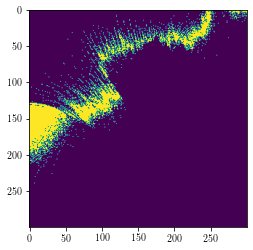

In [302]:
plt.imshow(guess.reshape(samples, samples))

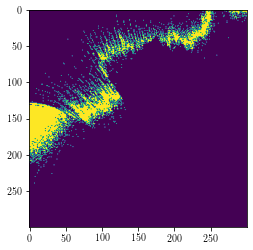

In [303]:
plt.imshow(ground_truth.reshape(samples, samples))

In [304]:
times_fma[10::10]

array([    100,    1000,   10000,  100000, 1000000])

In [305]:
times[28]
times_fma[40]

100000

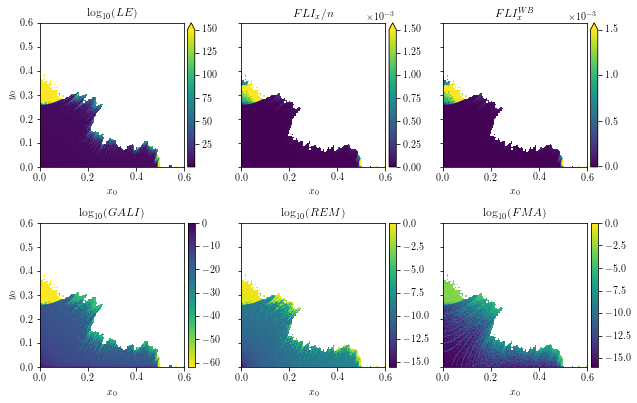

In [64]:
import types
def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymax
    self.offsetText.set(va="top", ha="left")
    self.offsetText.set_position(
            (-3, bottom + 17))

def register_bottom_offset(axis, func):
    axis._update_offset_text_position = types.MethodType(func, axis)    

fig = plt.figure(figsize=(10, 6.75))

gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))

sampling_time = 100000
t_idx = 35
t_fma_idx = -1

cmap = axs[0].imshow((lyapunov_post_data[t_idx]/2).reshape((samples, samples)), origin='lower', cmap='viridis', extent=EXTENT, vmax=150)

axs[0].set_xlabel('$x_0$')
axs[0].set_ylabel('$y_0$')
# add side colorbar
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')

axs[0].set_title("$\\log_{{10}}(LE)$")

cmap = axs[1].imshow((lyapunov_nob_post_data[t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis', extent=EXTENT, vmax=150/sampling_time)

axs[1].set_xlabel('$x_0$')
# hide y axis
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')
cbar.formatter.set_powerlimits((0, 0))
register_bottom_offset(cbar.ax.yaxis, bottom_offset)

axs[1].set_title("$FLI_x / n$")

cmap = axs[2].imshow((lyapunov_b_post_data[t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis', extent=EXTENT, vmax=150/sampling_time)

axs[2].set_xlabel('$x_0$')
# hide y axis
axs[2].set_yticklabels([])
axs[2].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')

axs[2].set_title("$FLI_x^{{WB}}$")

cmap = axs[3].imshow((gali_post_data[t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis_r', extent=EXTENT)
cbar.formatter.set_powerlimits((0, 0))
register_bottom_offset(cbar.ax.yaxis, bottom_offset)

axs[3].set_xlabel('$x_0$')
axs[3].set_ylabel('$y_0$')
# add side colorbar
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax)

axs[3].set_title("$\\log_{{10}}(GALI)$")

cmap = axs[4].imshow((rem_post_data[t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis', extent=EXTENT)

axs[4].set_xlabel('$x_0$')
# hide y axis
axs[4].set_yticklabels([])
axs[4].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[4])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax)

axs[4].set_title("$\\log_{{10}}(REM)$")

cmap = axs[5].imshow(fma_fft_post_data[t_fma_idx].reshape((samples, samples)), origin='lower', cmap='viridis', extent=EXTENT)

axs[5].set_xlabel('$x_0$')
# hide y axis
axs[5].set_yticklabels([])
axs[5].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[5])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax)

axs[5].set_title("$\\log_{{10}}(FMA)$")

# increase distance between subplots
plt.subplots_adjust(wspace=0.3)

plt.savefig(os.path.join(FIGDIR, f"overview.{FORMAT}"), bbox_inches="tight", dpi=DPI)


0.3010299956638959 153.89864402985333
(50, 50)
-17.719326778571205 -1.6694147142864542


/tmp/ipykernel_4404/3865768775.py:24: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_4404/3865768775.py:39: RuntimeWarning: divide by zero encountered in log10
  val_min, val_max = get_extents([l[mask] for l in np.log10(lyapunov_nob_post_data)[14::7]], 10)
/tmp/ipykernel_4404/3865768775.py:39: RuntimeWarning: invalid value encountered in log10
  val_min, val_max = get_extents([l[mask] for l in np.log10(lyapunov_nob_post_data)[14::7]], 10)
/tmp/ipykernel_4404/3865768775.py:43: RuntimeWarning: divide by zero encountered in log10
  tmp_data, bin_centers = compose_count_map([l[mask] for l in np.log10(lyapunov_nob_post_data)], val_min, val_max, nbins=50, density=False)
/tmp/ipykernel_4404/3865768775.py:43: RuntimeWarning: invalid value encountered in log10
  tmp_data, bin_centers = compose_count_map([l[mask] for l in np.log10(lyapunov_nob_post_data)], val_min, val_max, nbins=50, density=False)
/tmp/ipykernel_4404/3865768775.py:44: RuntimeW

(50, 50)
-17.718925924795165 -1.7335745874113173


/tmp/ipykernel_4404/3865768775.py:64: RuntimeWarning: invalid value encountered in log10
  tmp_data, bin_centers = compose_count_map([l[mask] for l in np.log10(lyapunov_b_post_data)], val_min, val_max, nbins=50, density=False)
/tmp/ipykernel_4404/3865768775.py:65: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_4404/3865768775.py:85: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)
/tmp/ipykernel_4404/3865768775.py:104: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


(50, 50)
-61.95801995185813 0.0
(50, 50)
-18.01809141116023 0.03572945632572654
(50, 50)
-15.954589770191003 5.5193354451395296e-08


/tmp/ipykernel_4404/3865768775.py:124: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


(4, 50)
(6, 50)


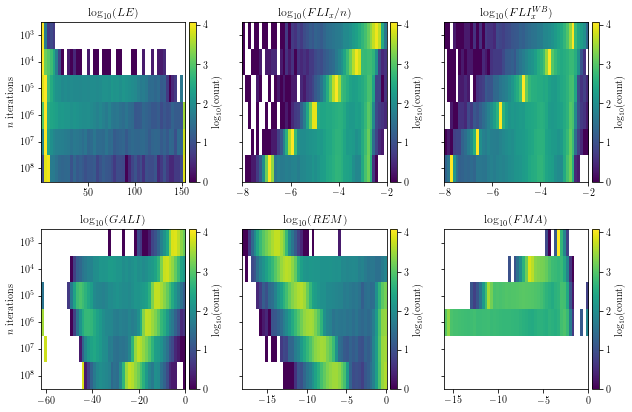

In [344]:
from multiprocessing import shared_memory


fig = plt.figure(figsize=(10, 6.75))

gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))

sampling_time = 100000
t_idx = 35
t_fma_idx = -1

val_min, val_max = get_extents([l[mask]/2 for l in lyapunov_post_data[14::7]], 10)
print(val_min, val_max)

tmp_data, bin_centers = compose_count_map([l[mask]/2 for l in lyapunov_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[0].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

axs[0].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[0].set_ylabel("$n$ iterations")
axs[0].set_title("$\\log_{{10}}(LE)$")

val_min, val_max = get_extents([l[mask] for l in np.log10(lyapunov_nob_post_data)[14::7]], 10)
print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in np.log10(lyapunov_nob_post_data)], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[1].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

axs[1].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[1].set_yticklabels([])
axs[1].set_ylabel('')
axs[1].set_title("$\\log_{{10}}(FLI_x / n)$")

val_min, val_max = get_extents([l[mask] for l in np.log10(lyapunov_b_post_data)[14::7]], 10)
print(val_min, val_max)
val_min = -8
val_max = -2
tmp_data, bin_centers = compose_count_map([l[mask] for l in np.log10(lyapunov_b_post_data)], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[2].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

axs[2].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[2].set_yticklabels([])
axs[2].set_ylabel('')
axs[2].set_title("$\\log_{{10}}(FLI_x^{{WB}})$")

val_min, val_max = get_extents([l[mask] for l in gali_post_data[14::7]], 10)
print(val_min, val_max)

tmp_data, bin_centers = compose_count_map([l[mask] for l in gali_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[3].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

axs[3].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])
axs[3].set_ylabel("$n$ iterations")

axs[3].set_title("$\\log_{{10}}(GALI)$")

val_min, val_max = get_extents([l[mask] for l in rem_post_data[14::7]], 10)
print(val_min, val_max)

tmp_data, bin_centers = compose_count_map([l[mask] for l in rem_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
print(tmp_data.shape)
tmp_data = tmp_data[14::7]

cmap = axs[4].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

divider = make_axes_locatable(axs[4])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

axs[4].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[4].set_yticklabels([])
axs[4].set_ylabel('')
axs[4].set_title("$\\log_{{10}}(REM)$")

val_min, val_max = get_extents([l[mask] for l in fma_fft_post_data[20::10]], 10)
print(val_min, val_max)

tmp_data, bin_centers = compose_count_map([l[mask] for l in fma_fft_post_data], val_min, val_max, nbins=50, density=False)
tmp_data = np.log10(tmp_data)
tmp_data = tmp_data[20::10]
print(tmp_data.shape)
# add two columns of nans to the bottom
tmp_data = np.concatenate((tmp_data, np.full((2, tmp_data.shape[1]), np.nan)), axis=0)
print(tmp_data.shape)

cmap = axs[5].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[14::7])-0.5], vmax=vmax, interpolation='none')

divider = make_axes_locatable(axs[5])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

axs[5].set_yticks(np.arange(0, tmp_data.shape[0], 1), [f"$10^{{{int(np.log10(t))}}}$" for t in times[14::7]][::-1])

axs[5].set_yticklabels([])
axs[5].set_ylabel('')
axs[5].set_title("$\\log_{{10}}(FMA)$")

plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)

plt.savefig(os.path.join(FIGDIR, f"evolution.{FORMAT}"), bbox_inches="tight", dpi=DPI)

# Performance plot

In [309]:
lyapunov_thresholds = []
lyapunov_post_data = []
lyapunov_guesses = []
lyapunov_scores = []
for t, data in zip(times, lyapunov_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    lyapunov_post_data.append(data)
    lyapunov_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_thresholds[-1])
    lyapunov_guesses.append(guess)
    lyapunov_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [310]:
lyapunov_nob_thresholds = []
lyapunov_nob_post_data = []
lyapunov_nob_guesses = []
lyapunov_nob_scores = []
for t, data in zip(times, lyapunov_nob_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    data[~mask] = np.nan
    lyapunov_nob_post_data.append(data)
    lyapunov_nob_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_nob_thresholds[-1])
    lyapunov_nob_guesses.append(guess)
    lyapunov_nob_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/589949087.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)


In [311]:
lyapunov_b_thresholds = []
lyapunov_b_post_data = []
lyapunov_b_guesses = []
lyapunov_b_scores = []
for t, data in zip(times, lyapunov_b_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    data[mask & (np.isinf(data))] = np.nanmax(data[mask & (~np.isinf(data))])
    data[~mask] = np.nan
    lyapunov_b_post_data.append(data)
    lyapunov_b_thresholds.append(find_threshold(data[mask]))
    guess = (data > lyapunov_b_thresholds[-1])
    lyapunov_b_guesses.append(guess)
    lyapunov_b_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log10(data)
/tmp/ipykernel_4404/1858982383.py:7: RuntimeWarning: invalid value encountered in log10
  data = np.log1

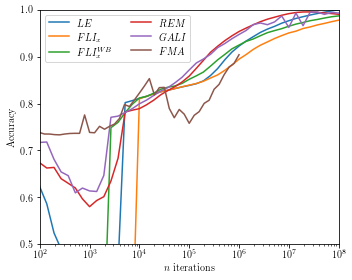

In [312]:
plt.figure(figsize=(5, 4))

plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="$LE$")
plt.plot(times, [s["accuracy"] for s in lyapunov_nob_scores], label="$FLI_x$")
plt.plot(times, [s["accuracy"] for s in lyapunov_b_scores], label="$FLI_x^{{WB}}$")
plt.plot(times, [s["accuracy"] for s in rem_scores], label="$REM$")
plt.plot(times, [s["accuracy"] for s in gali_scores], label="$GALI$")
plt.plot(times_fma, [s["accuracy"] for s in fma_birkhoff_scores], label="$FMA$")
# plt.plot(times_fma, [s["accuracy"] for s in fma_fft_scores], label="$FMA$")
plt.legend(ncol=2)

plt.xscale("log")
plt.xlim(1e2, 1e8)
plt.ylim(0.5, 1.0)
plt.xlabel("$n$ iterations")
plt.ylabel("Accuracy")
plt.tight_layout()

plt.savefig(os.path.join(FIGDIR, f"performance.{FORMAT}"), bbox_inches="tight", dpi=DPI)